IMDB Dataset

In [56]:
#Importing the Libraries
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers

In [70]:
#Splitting the Dataset into training and testing
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [58]:
# Key is word and value is index
word_index = imdb.get_word_index()

In [59]:
#Fucntion to vectorize the input data. We can also use TF-IDF or other vectorization model
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))       
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1                          
    return results

In [60]:
#Vectorizing the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [62]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
#Chanfing the data type of our label from categorical to float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [110]:
#Creating the Dense model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=x_train.shape))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [111]:
#Compiling the model with rmsprop. we can use other advanced optimizer such as SGD+mometum, Adadelta, Adagrad 

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
#Training the model
history = model.fit(x_train, y_train, epochs=5, batch_size=256)

Epoch 1/5
98/98 [==============================] - 1s 8ms/step - loss: 0.4655 - accuracy: 0.7696
Epoch 2/5
98/98 [==============================] - 1s 8ms/step - loss: 0.2014 - accuracy: 0.9279
Epoch 3/5
98/98 [==============================] - 1s 8ms/step - loss: 0.1531 - accuracy: 0.9424
Epoch 4/5
98/98 [==============================] - 1s 8ms/step - loss: 0.1082 - accuracy: 0.9622
Epoch 5/5
98/98 [==============================] - 1s 8ms/step - loss: 0.0748 - accuracy: 0.9737


In [113]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8692


In [114]:
history_dict = history.history

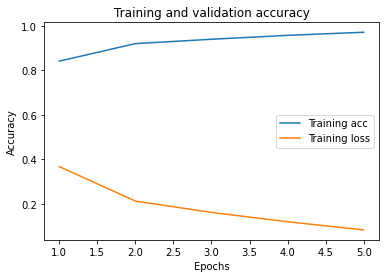

In [115]:
#Ploting the graph
import matplotlib.pyplot as plt

plt.clf()                                   
acc = history_dict['accuracy']
#val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, '-', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.plot(epochs, loss_values, '-', label='Training loss')  
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Summary:

1. The model is overfitting and we should stop the Training at Epoch 3
2. We Should change the Optimiser and minimize the complexity of the model
